# DATA620: Assignment 6

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina


## Notes
* analysis needs structure. there should be a step by step approach to the conclusions
* we should describe the steps and the outcomes for each step. right now we need to narrate each step because it is not layed out
* we need to add a more detailed conclusion
* eliminate filler code that does not add to analysis. this included the listing of the nodes and the edges. 

## Suggestions - David
* we can start by reviewing the paper that resulted in the dataset. I can look for write-ups
* I think it is a 5 step analysis ( please provide feedback)
    
    - build graph. including projections
    - initial analysis - quick visualization
    - Bipartite Network Graph reduction using the Island Method , Sub graph and Connected Components
        
        - this should generate 2 clicks and a few outliers
    - measures of centrality
    - conclusions
        
        - 2 clicks in the group
        - most popular events
        - most popular people


### Assignment
For this project, we will be working with Davis Southern Club Women network dataset obtained from a previously collected data by Davis et al in 1930s. It represent observed attendance of 18 southern women at 14 social events. It's a simple 2-node network.

* [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis)
* [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)
* [Python code to create dataset](https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html)

The objective of this week's assignment is:

* Load a dataset
* Create basic analysis
* Explore the relationship between (1) the women, and (2) the social events

### Overview

One of the first two-mode datasets to be analysed was the Davis’ Southern Women dataset (Davis et al., 1941), which recorded the attendance of a group of women (primary node set) to a series of events (secondary node set). A woman would be linked to an event if she attended it. This is a data set of 18 women observed over a nine-month period. During that period, various subsets of these women met in a series of 14 informal social events. The data recored which women met for which events.

Approach:
* Load the Graph
* Analyze the Network
* Analyze Measures of Centrality
* Conclusion


### Setup

In [113]:
import networkx as nx
import numpy as np
import matplotlib as mpl
from networkx import algorithms 
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import networkx.algorithms.bipartite as bipartite
import warnings
warnings.filterwarnings("ignore")

### Load the Graph
The graph can be loaded from the Networkx packages. This will create the full a full bipartite network with both nodes. For analysis we

In [114]:
# Import data
G = nx.davis_southern_women_graph()
women = G.graph["top"]
events = G.graph["bottom"]

The naive rendering of the graph illistrates a fully connected graph but provides limited additional information about the network structure. 

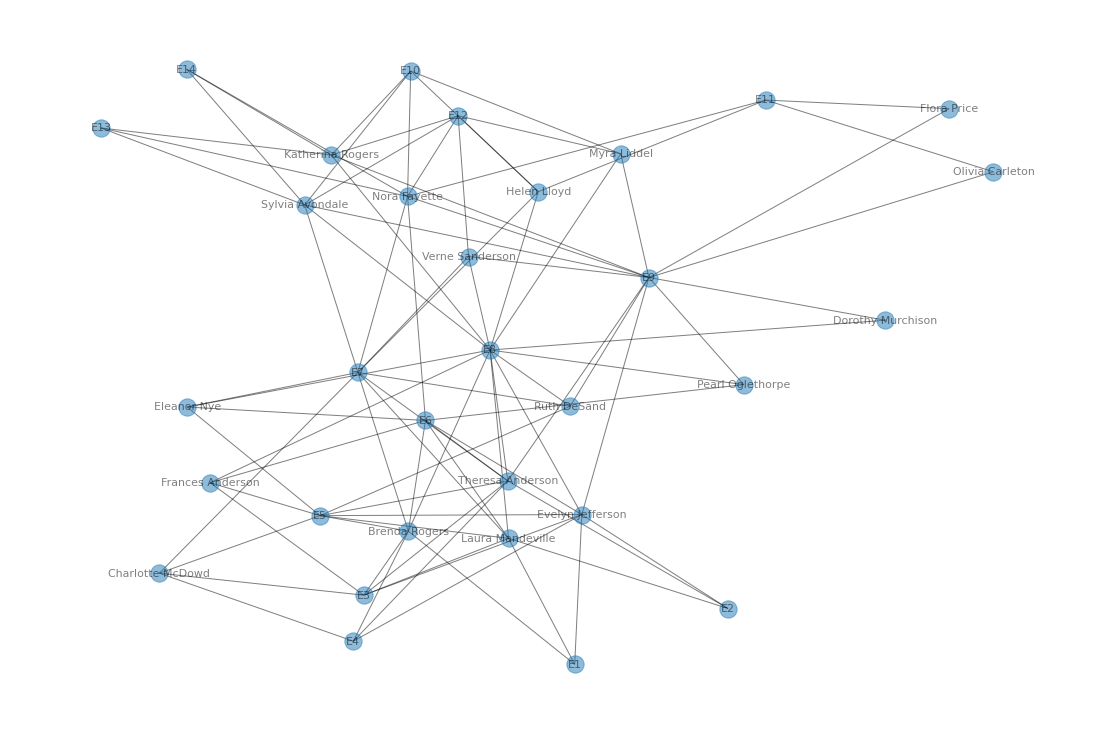

In [118]:
pos = nx.spring_layout(G)
plt.figure(1,figsize=(15,10)) 
nx.draw(G,pos,with_labels = True, font_size = 11, width=1.0,alpha=0.5)

The addition of color for the different types of nodes and size as a reflection highlights some high level patterns. The event nodes will be highlighted in blue and the women nodes will be a combination of pink and purple. The size of the node will indicate the connectivity of the specific node as measure by the degrees function.
* first we will calculate the degress for women and events
* render the graph coloring different types of nodes and adjusting the size of the node to reflect the degree of connectivity. 


In [ ]:
womenDegree = nx.degree(G, women) 
eventDegree = nx.degree(G, events)


pos = nx.spring_layout(G)
plt.figure(1,figsize=(15,10)) 

nx.draw_networkx_nodes(G,pos,
                       nodelist=women,
                       node_color='#FF66CC',
                       node_size=[v * 100 for v in dict(womenDegree).values()],
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=events,
                       node_color='#3399FF',
                       node_size=[v * 200 for v in dict(eventDegree).values()],
                   alpha=0.8)

# edges
nx.draw(G,pos,with_labels = True, font_size = 11, width=1.0,alpha=0.5)

In [ ]:
sorted(dict(eventDegree).items(),key=lambda item: item[1],reverse=True)[:5]

The visualization of the graph highlights several central events. If we create a sorted dictionary of event nodes using the degree of connectivness as the sort key we can see the primary events are 
* Event E8, E9, E6, E7, E5, and E6

We can also observe some clustering of the women nodes. These groups roughly include:
* Group 1 Evelyn Jefferson, Theresa Anderson,Brenda Rogers, Laura Mandeville, Frances Anderson
* Group 2 consists of Katherina Rogers, Nora Fayette, Sylvia Avondale


### Bipartite Network Graph Reduction 
We used the Island Method to reduce the graph to its primary nodes

### Analysis of Bipartite Graph (Women Projetion)
The analysis of the degrees of connectivity for the Davis Southern Club Women network
* project the graph onto the women node
* calculate degree, closeness, betweenes and eigenvectors centrality for the graph

In [ ]:
W = bipartite.weighted_projected_graph(G, women)

In [ ]:
deg = nx.degree(W)
c = nx.closeness_centrality(W)
b=nx.betweenness_centrality(W)
e = nx.eigenvector_centrality(W, max_iter=100) 

df = pd.DataFrame(women, columns=['name'])

df['Degree'] = df['name'].map(dict(deg))
df['Closeness'] = df['name'].map(dict(c))
df['Betweenness'] = df['name'].map(dict(b))
df['Eigenvector'] = df['name'].map(dict(e))

In [ ]:
df[df['Degree'] >= 17].sort_values('Degree',ascending=False, inplace=False).round(decimals=4)

Unsurprisingly the same group of women measure the highest in each of the centrality measures.
* Evelyn Jefferson	
* Theresa Anderson	
* Ruth DeSand
* Verne Sanderson
* Sylvia Avondale
* Nora Fayette
* Helen Lloyd	

Measures of Centrality
* Degree centrality - The 7 women listed above each had 17 connections to other women in the social club
* Closeness centrality - The 7 women listed above each had a 1 for the closeness centrality measure
* Betweenness centrality - The 7 women listed above each had a betweeness measure of 0.0101
* Eigenvector - The 7 women listeb above each had an eigenvector measure of 0.2535



In [ ]:
fig = px.scatter(df, x="Closeness", y="Betweenness", size="Degree", color="Eigenvector", 
                    hover_name="name", width=800, height=500, title="Davis Southern Club Women (measures of centrality)")
fig.show()

In [ ]:
plt.figure(1,figsize=(15,10)) 
weights=[edata['weight'] for f,t,edata in W.edges(data=True)]
#pos1 = nx.spring_layout(W, random_state = 100)
pos1 = nx.spring_layout(W)

nx.draw(W, pos1, with_labels=True, 
        width=weights, edge_color=weights,
        edge_cmap = plt.cm.Blues,
        node_size=500, font_size=15)

# Colorbar
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=plt.cm.Blues,
                               norm=mpl.colors.Normalize(1,7),
                               ticks=[1, 4, 7],
                               label='Edge Weights')

In [ ]:
dict(deg).values()

### Analysis of Bipartite Graph (Events Projection)

The analysis of the degrees of connectivity for the Davis Southern Club Women network

* project the graph using the event nodes
* calculate degree, closeness, betweenes and eigenvectors centrality for the graph

In [ ]:
E = bipartite.weighted_projected_graph(G, events)

deg = nx.degree(E)
c = nx.closeness_centrality(E)
b=nx.betweenness_centrality(E)
e = nx.eigenvector_centrality(E, max_iter=100) 

e_df = pd.DataFrame(events, columns=['name'])

e_df['Degree'] = e_df['name'].map(dict(deg))
e_df['Closeness'] = e_df['name'].map(dict(c))
e_df['Betweenness'] = e_df['name'].map(dict(b))
e_df['Eigenvector'] = e_df['name'].map(dict(e))

In [116]:
e_df[e_df['Degree'] >= 0].sort_values('Degree',ascending=False, inplace=False).round(decimals=4)

,name,Degree,Closeness,Betweenness,Eigenvector
5,E6,13,1.0000,0.0801,0.3393
6,E7,13,1.0000,0.0801,0.3393
7,E8,13,1.0000,0.0801,0.3393
8,E9,13,1.0000,0.0801,0.3393
0,E1,8,0.7222,0.0000,0.2323
1,E2,8,0.7222,0.0000,0.2323
2,E3,8,0.7222,0.0000,0.2323
3,E4,8,0.7222,0.0000,0.2323
4,E5,8,0.7222,0.0000,0.2323
9,E10,8,0.7222,0.0000,0.2323


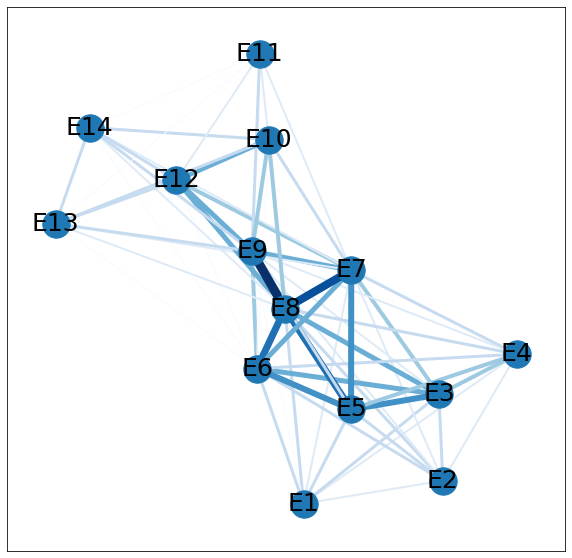

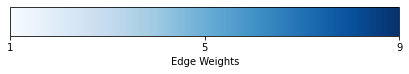

In [117]:
plt.figure(1,figsize=(10,10))
pos = nx.spring_layout(E)

weights=[edata['weight'] for f,t,edata in E.edges(data=True)]

nx.draw_networkx(E, pos, with_labels=True, 
                 width=weights, edge_color=weights,
                 edge_cmap=plt.cm.Blues,
                 node_size=750,font_size=25)

# Colorbar
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=plt.cm.Blues,
                               norm=mpl.colors.Normalize(1,9),
                               ticks=[1, 5, 9],
                               label='Edge Weights')

### Conclusion
The four most popular clubs in the network are clearly E6, E7, E8, E9 and thus have the greatest reach. Therefore, if we wanted to get a message to all women, we should use these three clubs to broadcast.
Even though Club E6 has eight members, its centralities are high. 
We can conclude that the most connected people in the network are women who have access to these clubs. And even though members like Ruth and Verne are only part of 4 clubs, their degree centrality and closeness centrality are very high. 